<a href="https://colab.research.google.com/github/jpcampos04/Sprint14_project/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostRegressor


In [ ]:
# Carga los datos en DataFrame
df = pd.read_csv('/datasets/car_data.csv')

In [ ]:
# Renombra las columnas
df = df.rename(columns={'DateCrawled': 'date_crawled', 'Price': 'price', 'VehicleType': 'type', 'RegistrationYear': 'reg_year', 'Gearbox': 'gearbox', 'Power': 'power', 'Model': 'model', 'Mileage': 'mile_age', 'RegistrationMonth': 'reg_month', 'FuelType': 'fuel_type', 'Brand': 'brand', 'NotRepaired': 'not_repaired', 'DateCreated': 'date_created', 'NumberOfPictures': 'n_pictures', 'PostalCode': 'postal_code', 'LastSeen': 'last_seen'})

In [ ]:
# Visualiza una muestra del DataFrame
print(df.sample(10))

            date_crawled  price         type  reg_year gearbox  power  \
188345  16/03/2016 19:49   3333  convertible      1997    auto    193   
228258  20/03/2016 15:40    700        wagon      1997  manual    101   
28487   04/04/2016 01:55   7990        small      2009  manual    120   
330769  30/03/2016 11:38    500        small      1997  manual     45   
17289   28/03/2016 07:53      0          NaN      1960  manual      0   
179996  04/04/2016 20:50   4900        wagon      2004  manual    150   
285339  01/04/2016 18:57   1150        small      2003  manual     50   
184455  03/04/2016 18:37    650        small      1996  manual     60   
53482   16/03/2016 21:37   1299        sedan      1993  manual    113   
240179  03/04/2016 17:55    175        sedan      1997  manual     75   

          model  mile_age  reg_month fuel_type       brand not_repaired  \
188345      3er    150000          7    petrol         bmw           no   
228258   vectra    150000         12    petrol

In [ ]:
# Visualiza la información del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date_crawled  354369 non-null  object
 1   price         354369 non-null  int64 
 2   type          316879 non-null  object
 3   reg_year      354369 non-null  int64 
 4   gearbox       334536 non-null  object
 5   power         354369 non-null  int64 
 6   model         334664 non-null  object
 7   mile_age      354369 non-null  int64 
 8   reg_month     354369 non-null  int64 
 9   fuel_type     321474 non-null  object
 10  brand         354369 non-null  object
 11  not_repaired  283215 non-null  object
 12  date_created  354369 non-null  object
 13  n_pictures    354369 non-null  int64 
 14  postal_code   354369 non-null  int64 
 15  last_seen     354369 non-null  object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB
None


In [ ]:
# Corrige los tipos de datos del Dataframe
df['date_crawled'] = pd.to_datetime(df['date_crawled'], errors='coerce')
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
df['last_seen'] = pd.to_datetime(df['last_seen'], errors='coerce')

In [ ]:
# Rellena los datos nulos
df[['type', 'gearbox', 'model', 'fuel_type', 'not_repaired']] = df[['type', 'gearbox', 'model', 'fuel_type', 'not_repaired']].fillna(value='unknown')

In [ ]:
# Filtrar valores irreales
df = df[(df['price'] > 100) & (df['price'] < 500000)]
df = df[(df['power'] > 10) & (df['power'] < 1000)]
df = df[(df['reg_year'] >= 1950) & (df['reg_year'] <= 2022)]

In [ ]:
# Verifica los cambios a la información del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304803 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_crawled  304803 non-null  datetime64[ns]
 1   price         304803 non-null  int64         
 2   type          304803 non-null  object        
 3   reg_year      304803 non-null  int64         
 4   gearbox       304803 non-null  object        
 5   power         304803 non-null  int64         
 6   model         304803 non-null  object        
 7   mile_age      304803 non-null  int64         
 8   reg_month     304803 non-null  int64         
 9   fuel_type     304803 non-null  object        
 10  brand         304803 non-null  object        
 11  not_repaired  304803 non-null  object        
 12  date_created  304803 non-null  datetime64[ns]
 13  n_pictures    304803 non-null  int64         
 14  postal_code   304803 non-null  int64         
 15  last_seen     304

In [ ]:
# Elimina las fechas
df = df.drop(['date_crawled', 'date_created', 'last_seen'], axis=1)

<AxesSubplot:>

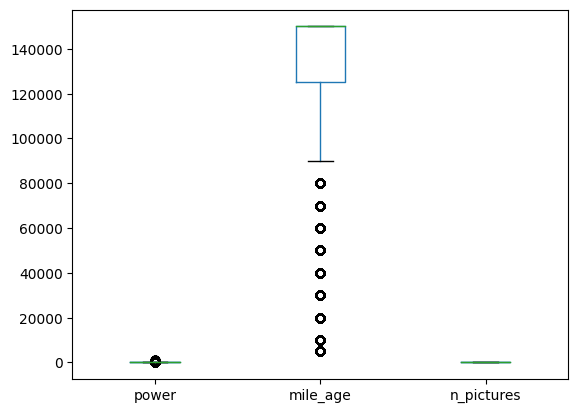

In [ ]:
# Almacena el nombre de columnas categóricas
categorical = ['type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

# Almacena el nombre de columnas númericas
numeric = ['power', 'mile_age', 'n_pictures']

# Visualiza las variables a escalar
df[numeric].plot(kind="box")

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Preparación sólida: carga y renombrado consistentes, conversión de fechas, imputación clara, filtros razonables para precio/potencia/año, correcta selección de variables y exploración inicial con boxplot. Buen arranque para un modelado confiable. </div>


## Entrenamiento del modelo

In [ ]:
# Almacena el escalador
scaler = StandardScaler()
# Estandariza las variables numéricas
df[numeric] = scaler.fit_transform(df[numeric])

<AxesSubplot:>

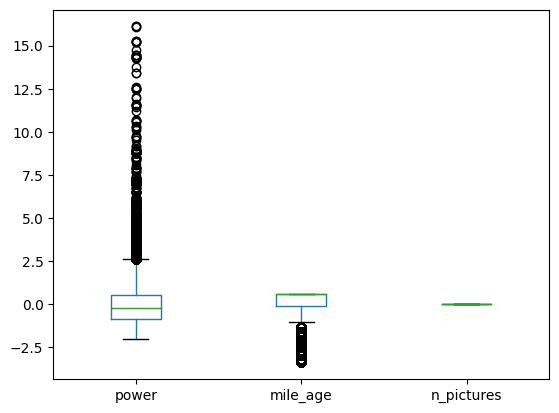

In [ ]:
# Visualiza las variables escaladas
df[numeric].plot(kind="box")

In [ ]:
# Divide las características y el objetivo
features = df.drop('price', axis=1)
target = df['price']

# Divide los datos para entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

print(features_train.shape)
print(features_valid.shape)

(228602, 12)
(76201, 12)


In [ ]:
# Define la función RECM
def recm(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
# Lista vacía para almacenar los resultados
results = []

In [ ]:
# Regresión lineal
cat_cols = features.select_dtypes(include='object').columns.tolist()
num_cols = features.select_dtypes(exclude='object').columns.tolist()

pre_ohe = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

intercepts = ['True', 'False']

for intercept in intercepts:
    lr_model = Pipeline([
    ('pre', pre_ohe),
    ('model', LinearRegression(fit_intercept=intercept))
    ])

    start = time.time()
    lr_model.fit(features_train, target_train)
    train_time = time.time() - start

    pred_lr = lr_model.predict(features_valid)
    results.append(['LinearRegression', recm(target_valid, pred_lr), train_time])

In [ ]:
# Decisión Tree
min_samples_split = [2, 3]
max_depth = [6, 9]

for split in min_samples_split:
    for depth in max_depth:
        dt_model = Pipeline([
        ('pre', pre_ohe),
        ('model', DecisionTreeRegressor(max_depth= depth, min_samples_split= split, random_state=12345))
        ])

        start = time.time()
        dt_model.fit(features_train, target_train)
        train_time = time.time() - start

        pred_dt = dt_model.predict(features_valid)
        results.append(['DecisionTree', recm(target_valid, pred_dt), train_time])

In [ ]:
# Random Forest
n_estimators = [50, 100]
max_depth = [5, 10]

for estimators in n_estimators:
    for depth in max_depth:
        rf_model = Pipeline([
        ('pre', pre_ohe),
        ('model', RandomForestRegressor(
            n_estimators=estimators, max_depth=depth, random_state=12345, n_jobs=-1
        ))
        ])

        start = time.time()
        rf_model.fit(features_train, target_train)
        train_time = time.time() - start

        pred_rf = rf_model.predict(features_valid)
        results.append(['RandomForest', recm(target_valid, pred_rf), train_time])

In [ ]:
# CatBoost
learning_rate = [0.1, 0.2]
max_depth = [4, 8]

for depth in max_depth:
    for rate in learning_rate:
        cat_features_idx = [features.columns.get_loc(c) for c in cat_cols]
        cat_model = CatBoostRegressor(
            iterations=4,
            depth=depth,
            learning_rate=rate,
            loss_function='RMSE',
            random_seed=12345,
            verbose=False
        )

        start = time.time()
        cat_model.fit(features_train, target_train, cat_features=cat_features_idx)
        train_time = time.time() - start

        pred_cat = cat_model.predict(features_valid)
        results.append(['CatBoost', recm(target_valid, pred_cat), train_time])


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Entrenamiento bien estructurado: escalado correcto, separación clara de variables, división de datos equilibrada y pruebas con múltiples modelos y parámetros. Esto da solidez al análisis comparativo posterior. </div>


## Análisis del modelo

In [ ]:
results_df = pd.DataFrame(results, columns=['Modelo', 'RECM', 'Tiempo Entrenamiento (s)'])
print(results_df)

              Modelo         RECM  Tiempo Entrenamiento (s)
0   LinearRegression  2797.801011                  0.600624
1   LinearRegression  2797.801011                  0.716975
2       DecisionTree  2311.486383                  1.294900
3       DecisionTree  2035.224745                  3.214722
4       DecisionTree  2311.486383                  1.275207
5       DecisionTree  2036.164928                  3.168400
6       RandomForest  2426.255092                 13.487399
7       RandomForest  1890.852443                 71.157531
8       RandomForest  2426.331266                 26.344545
9       RandomForest  1889.253277                143.541362
10          CatBoost  3700.003659                  0.523566
11          CatBoost  3128.807887                  0.465500
12          CatBoost  3548.072518                  0.564619
13          CatBoost  2866.555039                  0.546919


- El módelo que mejor metrica RECM posee fue un RandamoForest por lo que lo más probable sea que no se eligierón los hiperparametros más adecuados en el entrenamiento de tanto los modelos DecisionTree y CatBoost.
- A su vez puede que la eliminación de las variables de fecha hay impactado en las predicciones.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Análisis claro con comparación de métricas y tiempos, identificando el mejor rendimiento en RandomForest y reflexionando sobre posibles causas de resultados menos óptimos en otros modelos. Buena capacidad crítica en la interpretación. </div>


# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos

## Comentario general del revisor

# Comentario General del Revisor

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio y entrenamiento de modelos predictivos siguiendo las directrices planteadas.  

#### Puntos Positivos:

* **Procesamiento de datos:** Limpieza sólida con conversión de tipos, imputación de valores faltantes, filtrado de outliers y estandarización de variables numéricas.
* **Modelado:** Entrenamiento y comparación de múltiples algoritmos (Regresión Lineal, Árbol de Decisión, Random Forest y CatBoost) con diferentes configuraciones de hiperparámetros, cumpliendo la exigencia de al menos dos modelos distintos y evaluando un algoritmo de potenciación del gradiente.
* **Evaluación:** Uso correcto de la métrica RECM para todos los modelos, con registro de tiempos de entrenamiento para análisis de eficiencia.
* **Análisis crítico:** Interpretación de los resultados, identificando el modelo con mejor desempeño y considerando posibles causas de variaciones en las métricas.

Este proyecto **cumple con todos los requisitos del brief**, incluyendo la comparación de calidad y velocidad de predicción, así como la consideración del tiempo de entrenamiento. </div>
